In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
import imageEnhance as eh
import tensorflow as tf
import os

In [2]:
gt_dir = 'groundtruth/gt'
input_dir = 'input/input'

In [3]:
#Global Histogram Equalization for input1 from testset1
img = cv2.imread(input_dir + str(17) + ".jpg")
H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
eq_V = cv2.equalizeHist(V)
eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2RGB)

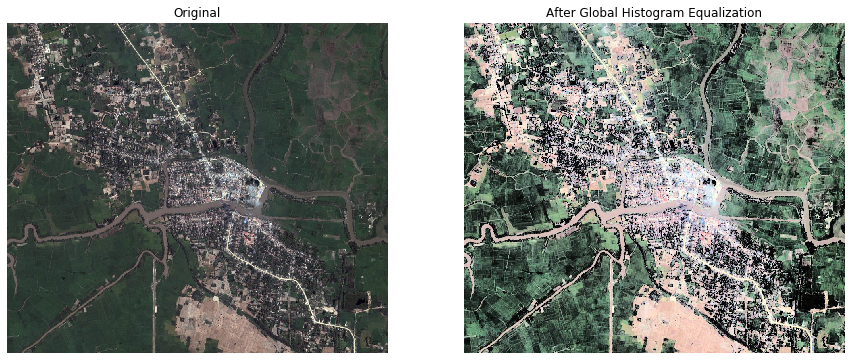

In [16]:
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(eq_image)
plt.title("After Global Histogram Equalization")
plt.axis('off')
plt.savefig('After Global Histogram Equalization.png', format = 'png', dpi = 1200)
plt.show()

In [ ]:
pout = cv2.imread('pout.png', cv2.IMREAD_GRAYSCALE)
hist0 = cv2.calcHist([pout],[0],None,[256],[0,256])    # using OpenCV function
hist,bins = np.histogram(pout.ravel(),256,[0,256])     # using Numpy function
plt.figure(figsize=(8,8))
plt.subplot(121), plt.plot(hist0)
plt.subplot(122), plt.plot(hist, color = "r")
plt.show()

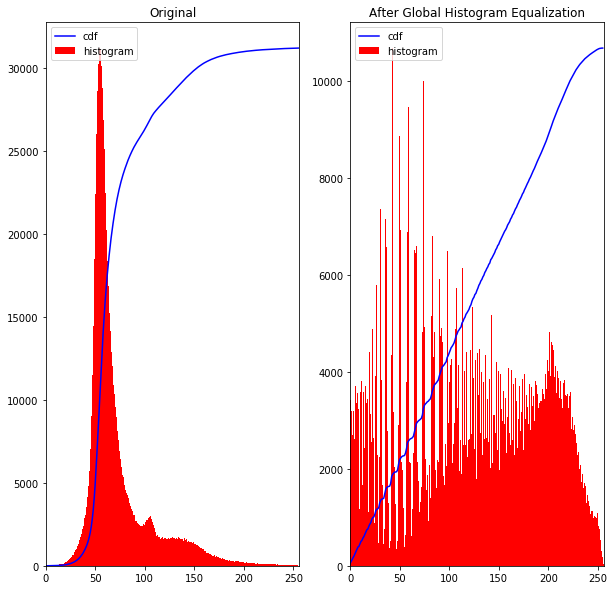

In [22]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(eq_image, cv2.COLOR_RGB2GRAY)

hist1,bins1 = np.histogram(img1.flatten(),256,[0,256])
hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
# this finds the cdf of the histogram 
cdf1 = hist1.cumsum() 
cdf2 = hist2.cumsum() 

cdf_normalized1 = cdf1 * hist1.max()/ cdf1.max()     # normalize just to scale values down to show it clearly within histogram
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()

fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1), plt.plot(cdf_normalized1, color = 'b'), plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.title("Original")
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.subplot(1, 2, 2), plt.plot(cdf_normalized2, color = 'b'), plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.title("After Global Histogram Equalization")
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.savefig('After Global Histogram Equalization2.png', format = 'png', dpi = 1200)
plt.show()

In [18]:
#Global Histogram Equalization for input1 from testset1
img3 = cv2.imread(input_dir + str(17) + ".jpg")
cla = cv2.createCLAHE(4.0)
H, S, V = cv2.split(cv2.cvtColor(img3, cv2.COLOR_BGR2HSV))
eq_V = cla.apply(V)
eq_image2 = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2RGB)

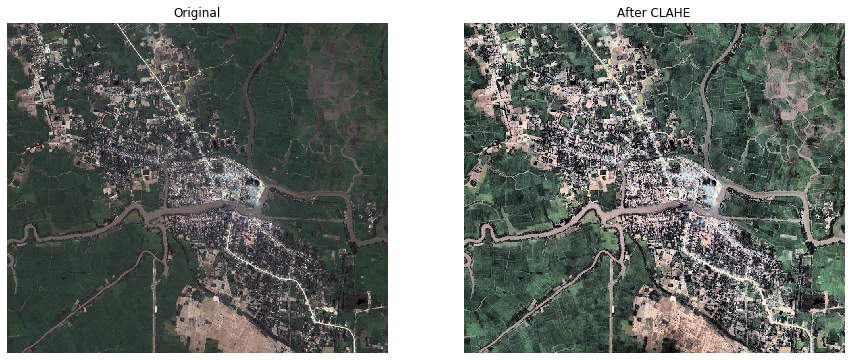

In [20]:
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(eq_image2)
plt.title("After CLAHE")
plt.axis('off')
plt.savefig('After CLAHE.png', format = 'png', dpi = 1200)
plt.show()

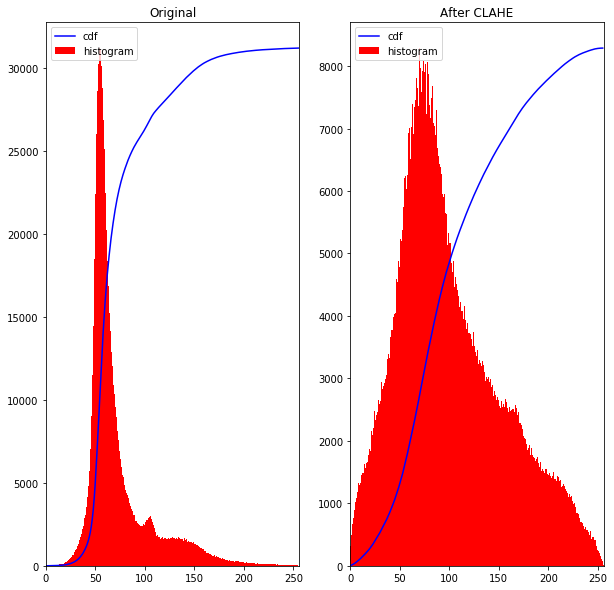

In [21]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(eq_image2, cv2.COLOR_RGB2GRAY)

hist1,bins1 = np.histogram(img1.flatten(),256,[0,256])
hist3,bins3 = np.histogram(img4.flatten(),256,[0,256])

# this finds the cdf of the histogram 
cdf1 = hist1.cumsum() 
cdf3 = hist3.cumsum() 

cdf_normalized1 = cdf1 * hist1.max()/ cdf1.max()     # normalize just to scale values down to show it clearly within histogram
cdf_normalized3 = cdf3 * hist3.max()/ cdf3.max()

fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1), plt.plot(cdf_normalized1, color = 'b'), plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.title("Original")
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(1, 2, 2), plt.plot(cdf_normalized3, color = 'b'), plt.hist(img4.flatten(),256,[0,256], color = 'r')
plt.title("After CLAHE")
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.savefig('After CLAHE2.png', format = 'png', dpi = 1200)
plt.show()

In [23]:
#Gamma correction is applied next
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

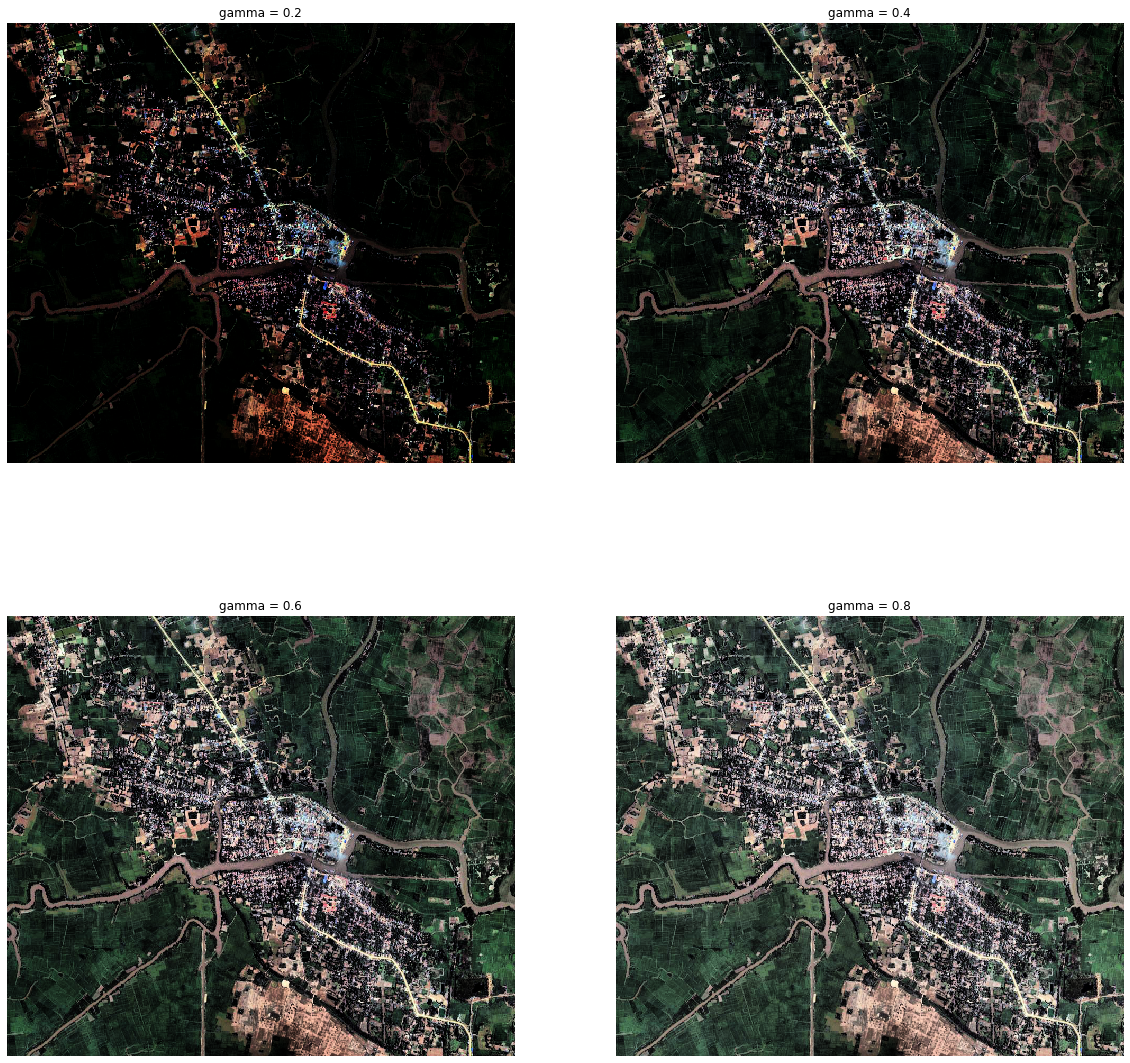

In [24]:
mylist = [0.2, 0.4, 0.6, 0.8]
fig = plt.figure(figsize=(20,20))
for index, value in enumerate(mylist):
    gc_image = adjust_gamma(eq_image2,value)
    plt.subplot(2, 2, (index + 1))
    plt.imshow(gc_image)
    plt.title("gamma = " + str(value))
    plt.axis('off')
    
plt.savefig('After gamma.png', format = 'png', dpi = 1200)
plt.show()

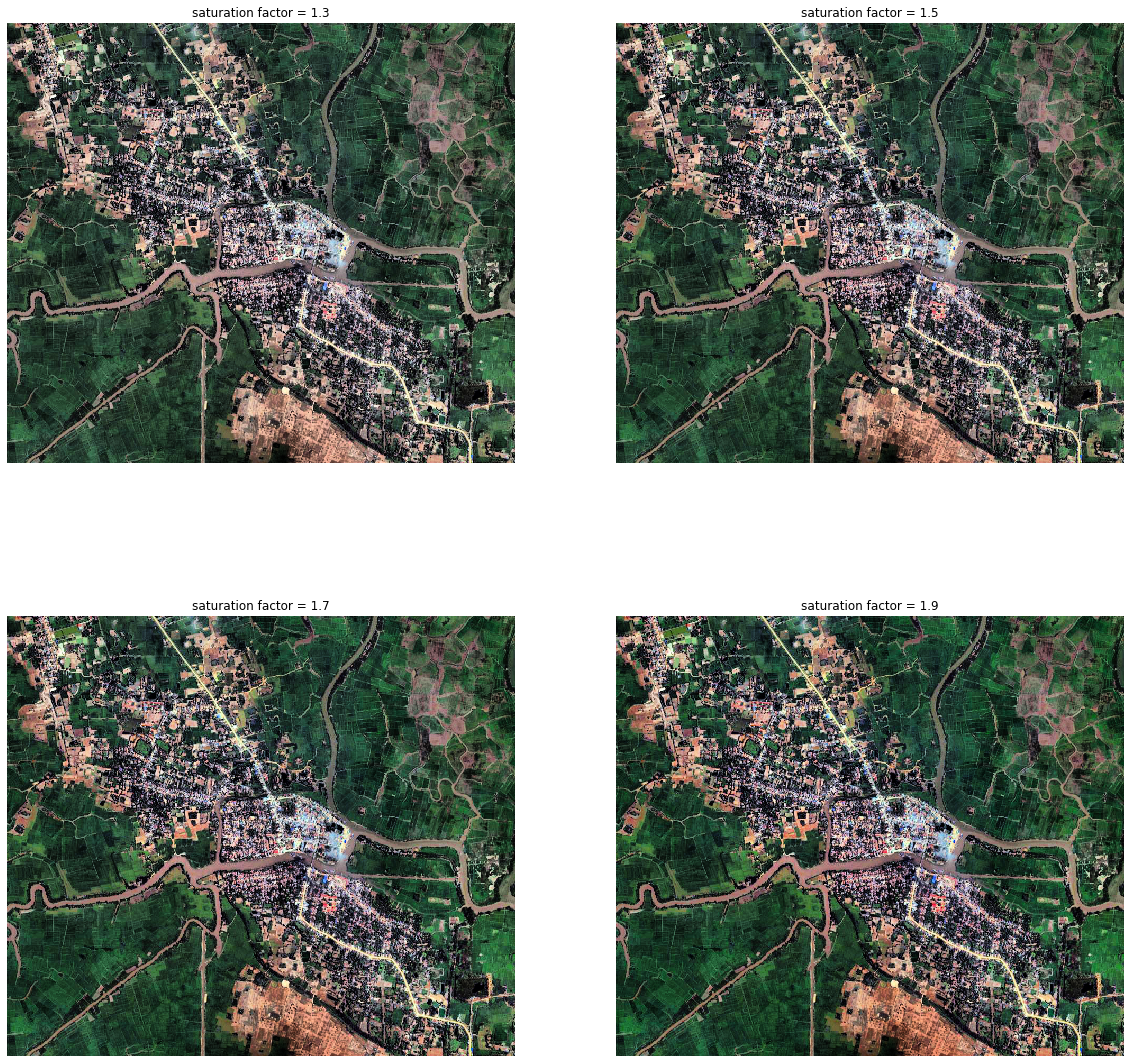

In [25]:
#apply saturation adjustment
mylist = [1.3, 1.5, 1.7, 1.9]
fig = plt.figure(figsize=(20,20))
for index, value in enumerate(mylist):
    output2 = tf.image.adjust_saturation(gc_image, value)
    output3 = output2.eval(session=tf.compat.v1.Session())
    plt.subplot(2, 2, (index + 1))
    plt.imshow(output3)
    plt.title("saturation factor = " + str(value))
    plt.axis('off')
    
plt.savefig('After saturation.png', format = 'png', dpi = 1200)
plt.show()